# A simple example for logistic regression
This notebook calculates a logistic regression using TensorFlow. It's basically meant to show the principles of TensorFlow.

## Datset

We investigate the data set of the challenger flight with broken O-rings (Y=1) vs start temperature.

[40, 85, -0.1, 1.2]

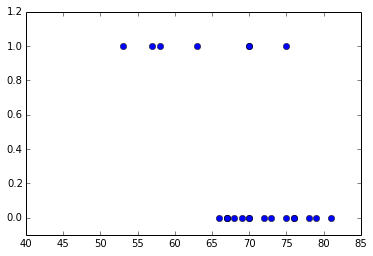

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
data = np.asarray(pd.read_csv('../challenger.txt', sep=','), dtype='float32')
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])

## Mathematical Notes
We are considering the likelihood $p(y_i=1|x_i)$ for the class $y_i=1$ given the $i-$th data point $x_i$ ($x_i$ could be a vector). This is given by:
$
p(y_i=1 | x_i) = \frac{e^{(b + W' x_i)}}{1 + e^{(b + W' x_i)}} = [1 + e^{-(b + W' x_i)}]^{-1}
$

If we have more than one data point, which we usually do, we have to apply the equation above to each of the N data points. In this case we can used a vectorized version with $x=(x_1,x_2,\ldots,x_N)$ and $y=(y_1,y_2,\ldots,y_N$)

In [2]:
import numpy
import tensorflow as tf

### Numpy code
This numpy code, shows the calculation for one value using numpy (like a single forward pass)

In [4]:
# Data
N = len(data)
x = data[:,0]
y = data[:,1]
# Initial Value for the weights
w = -0.20
b = 14.0
# Log-Likelihood 
p_1 = 1 / (1 + np.exp(-x*w - b))
like = y * np.log(p_1) + (1-y) * np.log(1-p_1)
-np.mean(like)

0.55324286

### Tensorflow Code (forward pass)

In [5]:
import tensorflow as tf
tf.reset_default_graph() #Just to be sure to start with an empty graph

x = tf.placeholder('float32', [N], name='x_data')
y = tf.placeholder('float32', [N], name='y_data')
# Initial weights with initial values
w = tf.Variable(-0.20, name = 'w') 
b = tf.Variable(14.0, name = 'b')

init_op = tf.initialize_all_variables() 
p_1 = 1 / (1 + tf.exp(-x*w - b))
like = y * tf.log(p_1) + (1-y) * tf.log(1-p_1)
loss = -tf.reduce_mean(like) #<----- All up to now is a symbolic definition of a graph
with tf.Session() as sess:
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    res = sess.run(loss, feed_dict={x:data[:,0], y:data[:,1]})
    print(res)

0.553243


### Training 


In [6]:
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
#train_op = tf.train.AdagradOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(100):
        res, _, w_val, b_val = sess.run((loss, train_op, w, b), feed_dict={x:data[:,0], y:data[:,1]})
        if (i % 100 == 0):
            print(res)
print ("{} {} {}".format(res, w_val, b_val))


0.553243
0.442085832357 -0.216906681657 13.9998521805


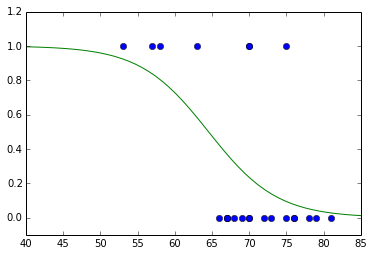

In [7]:
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = 1 / (1 + np.exp(-x_pred*w_val - b_val))
plt.plot(x_pred, y_pred)

### Storing of the graph

In [8]:
with tf.Session() as sess:
    sess.run(init_op)
    writer = tf.train.SummaryWriter("/tmp/", sess.graph_def, 'graph.pbtxt') #<--- Where to store

### Performance can be visualized in Tensorboard

The performance can be visualized in Tensorboard. 
```
    tensorboard --logdir /tmp/ --port 8081
```
and open a browser at
http://localhost:8081